In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from dbhelper import pd_query
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plot_acfpacf(data, lags=48):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data, lags=lags, ax=ax2)

In [4]:
query = '''
        select 
            date, 
            extract(minute from date) as minute,
            waittime
        from mungedata
        where
            munger_id = 1
            and crossing_id = 1
        order by date
        '''

df = pd_query(query)

In [5]:
df.head()

,date,minute,waittime
0,2010-11-01 00:00:00,0,0
1,2010-11-01 00:05:00,5,0
2,2010-11-01 00:10:00,10,0
3,2010-11-01 00:15:00,15,0
4,2010-11-01 00:20:00,20,0


In [6]:
df30 = df[(df.minute == 0) | (df.minute == 30)]

In [7]:
ts = df30[['date', 'waittime']].set_index('date')

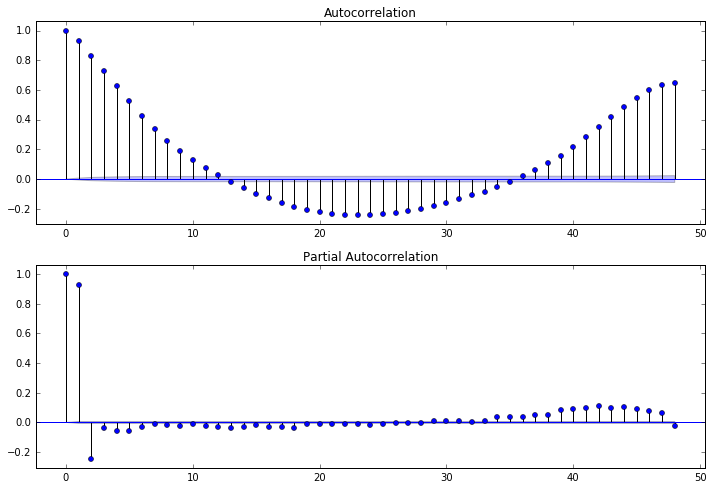

In [8]:
plot_acfpacf(ts)

## first difference

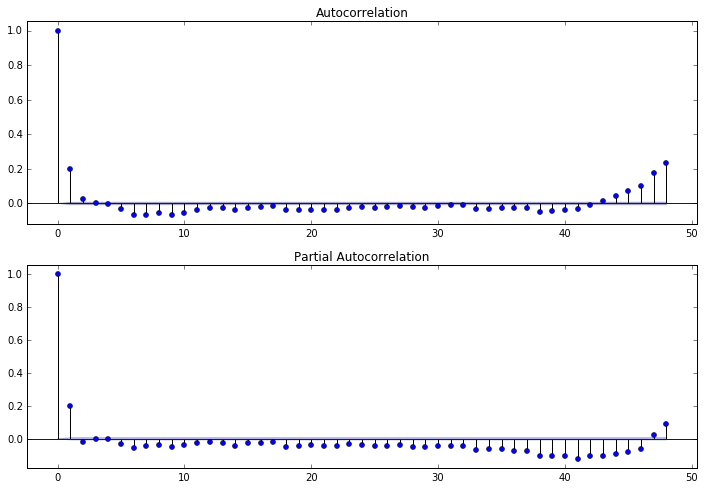

In [9]:
plot_acfpacf(ts.diff(periods=1)[1:])

## first difference + daily difference

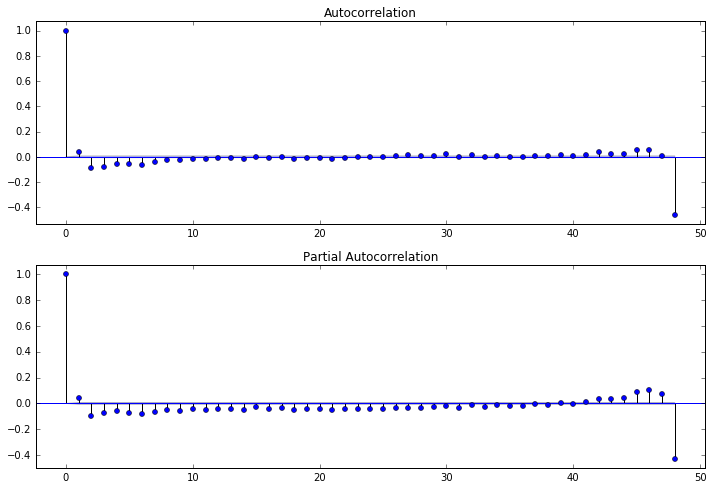

In [10]:
plot_acfpacf(ts.diff(periods=1)[1:].diff(periods=48)[48:])

## daily difference only

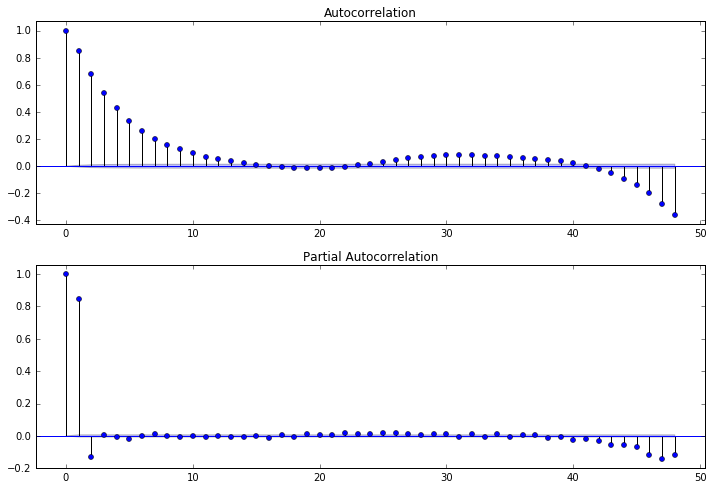

In [11]:
plot_acfpacf(ts.diff(periods=48)[48:])

## Based on ACF/PACF:
* 1 diff term
* 1 AR term
* 1 seasonal diff term @ 48
* 1 seasonal MA term

# Parameters via auto.arima

In [ ]:
model=SARIMAX(ts, order=(4,1,0), seasonal_order=(2,0,0,48)).fit()
model.summary()

In [ ]:
plot_acfpacf(model.resid)

In [ ]:
yhat = model.predict(end='2016')

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(yhat, label='predict')
plt.legend();

## modelling failed - either never finishes or kernel restarts